In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install neattext


In [ ]:
!pip install contractions

In [ ]:
import pandas as pd
import numpy as np
import neattext.functions as nfx
import contractions
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/BBC News Train.csv') #importing csv file
df.head()

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


In [ ]:
#cleaning the data
df['Clean_Text']=df['Text'].apply(nfx.remove_multiple_spaces)# taken reference from https://www.analyticsvidhya.com/blog/2021/10/cleaning-and-pre-processing-textual-data-with-neattext-library/
# use contraction to lower case, expands short words
df['Clean_Text']=df['Clean_Text'].apply(lambda x: nfx.fix_contractions(x)) # taken reference from https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_stopwords) # removing stop words
df.head()


,Text,Category,Clean_Text
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launches defence lawyers defe...
1,german business confidence slides german busin...,business,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens maj...
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,enron bosses in $168m payout eighteen former e...,business,enron bosses $168m payout eighteen enron direc...


In [ ]:
df['Category'].unique() #finding categories

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [ ]:
#assigning categories to numeric lables
df['CategoryLabel']=df['Category'].map({'business':0,'tech':1,'politics':2,'sport':3,'entertainment':4}) 
df

,Text,Category,Clean_Text,CategoryLabel
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launches defence lawyers defe...,0
1,german business confidence slides german busin...,business,german business confidence slides german busin...,0
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens maj...,0
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...,1
4,enron bosses in $168m payout eighteen former e...,business,enron bosses $168m payout eighteen enron direc...,0
...,...,...,...,...
1485,double eviction from big brother model caprice...,entertainment,double eviction big brother model caprice holb...,4
1486,dj double act revamp chart show dj duo jk and ...,entertainment,dj double act revamp chart dj duo jk joel taki...,4
1487,weak dollar hits reuters revenues at media gro...,business,weak dollar hits reuters revenues media group ...,0
1488,apple ipod family expands market apple has exp...,tech,apple ipod family expands market apple expande...,1


In [ ]:
x=df['Clean_Text'] #storing one of the column to x varible
y=df['CategoryLabel']

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2) #splitting train and test data

In [ ]:
# converting into matrix having TF-IDF features
tv= TfidfVectorizer(encoding='utf-8', ngram_range=(1,2),max_df=20,min_df=2, max_features=4000 , norm='l2',sublinear_tf=True) # using tfid vectorization 

In [ ]:
tx_train= tv.fit_transform(x_train).toarray() # transforming raw data into TF-IDF 

tx_test= tv.transform(x_test).toarray()

In [ ]:
#creating ml model using Logistic Regression algorithm
from  sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(tx_train,y_train)
y_p=model.predict(tx_test)
y_p_p=model.predict_proba(tx_test)

In [ ]:
print('accuracy is :', accuracy_score(y_test,y_p)) #showing accuracy 


accuracy is : 0.9664429530201343


In [ ]:
print("muliclass confusion matrix is :\n", confusion_matrix(y_test,y_p)) #showing confusion matrix

muliclass confusion matrix is :
 [[63  0  0  0  0]
 [ 4 41  0  0  0]
 [ 4  0 59  0  1]
 [ 0  0  0 69  0]
 [ 0  0  1  0 56]]


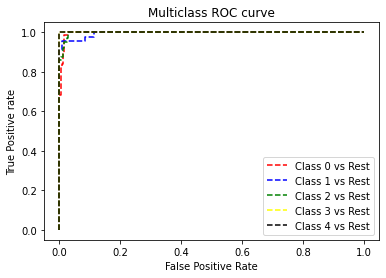

In [ ]:
#showing multiclass ROC curve
#taken reference from https://inblog.in/AUC-ROC-score-and-curve-in-multiclass-classification-problems-2ja4jOHb2X
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_p_p[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='black', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [ ]:
#testing the model by putting “text” as an input and returnunf the predicted category.
data=['lifestyle  governs mobile choice  faster  better or funkier hardware alone is not going to help phone firms sell more handsets  research suggests.  instead  phone firms keen to get more out of their customers should not just be pushing the technology for its own sake. consumers are far more interested in how handsets fit in with their lifestyle than they are in screen size  onboard memory or the chip inside  shows an in-depth study by handset maker ericsson.  historically in the industry there has been too much focus on using technology   said dr michael bjorn  senior advisor on mobile media at ericsson s consumer and enterprise lab.  we have to stop saying that these technologies will change their lives   he said.  we should try to speak to consumers in their own language and help them see how it fits in with what they are doing   he told the bbc news website.  for the study  ericsson interviewed 14 000 mobile phone owners on the ways they use their phone.  people s habits remain the same   said dr bjorn.  they just move the activity into the mobile phone as it s a much more convenient way to do it.   one good example of this was diary-writing among younger people  he said. while diaries have always been popular  a mobile phone -- especially one equipped with a camera -- helps them keep it in a different form. youngsters  use of text messages also reflects their desire to chat and keep in contact with friends and again just lets them do it in a slightly changed way. dr bjorn said that although consumers do what they always did but use a phone to do it  the sheer variety of what the new handset technologies make possible does gradually drive new habits and lifestyles. ericsson s research has shown that consumers divide into different  tribes  that use phones in different ways. dr bjorn said groups dubbed  pioneers  and  materialists  were most interested in trying new things and were behind the start of many trends in phone use.  for instance   he said   older people are using sms much more than they did five years ago.  this was because younger users  often the children of ageing mobile owners  encouraged older people to try it so they could keep in touch.  another factor governing the speed of change in mobile phone use was the simple speed with which new devices are bought by pioneers and materialists. only when about 25% of people have handsets with new innovations on them  such as cameras  can consumers stop worrying that if they send a picture message the person at the other end will be able to see it.  once this significant number of users is passed  use of new innovations tends to take off. dr bjorn said that early reports of camera phone usage in japan seemed to imply that the innovation was going to be a flop. however  he said  now 45% of the japanese people ericsson questioned use their camera phone at least once a month. in 2003 the figure was 29%. similarly  across europe the numbers of people taking snaps with cameras is starting to rise. in 2003 only 4% of the people in the uk took a phonecam snap at least once a month. now the figure is 14%. similar rises have been seen in many other european nations. dr bjorn said that people also used their camera phones in very different ways to film and even digital cameras.  usage patterns for digital cameras are almost exactly replacing usage patterns for analogue cameras   he said. digital cameras tend to be used on significant events such as weddings  holidays and birthdays. by contrast  he said  camera phones were being used much more to capture a moment and were being woven into everyday life.']
data2=tv.transform(data).toarray()
print('The article belong to class :',model.predict(data2)) 


The article belong to class : [1]
